In [1]:
import matplotlib.pyplot as plt

In [2]:
import librosa
audio_path = '17913-4-1-0.wav'
audio_data , sr = librosa.load(audio_path)

In [3]:
print(audio_data , sr)

[-0.02088965 -0.03462803 -0.03700296 ... -0.00643876 -0.01803743
 -0.01740858] 22050


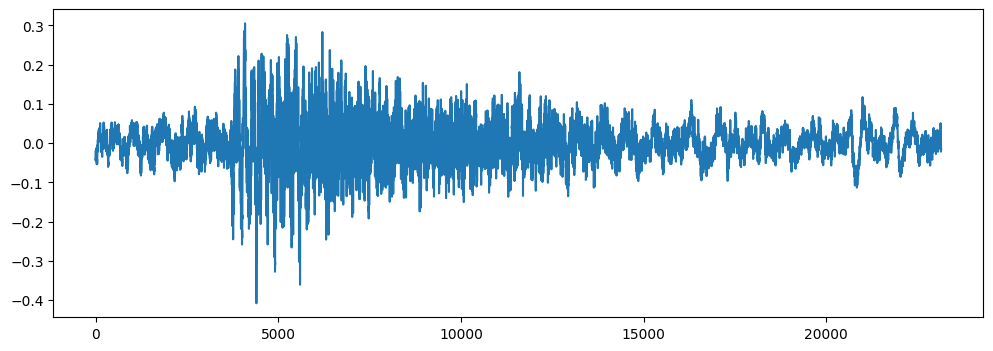

In [4]:
plt.figure(figsize =(12,4))
plt.plot(audio_data)

In [5]:
mfcss = librosa.feature.mfcc(y=audio_data ,sr=sr ,n_mfcc=40)
print(mfcss.shape)

(40, 46)


In [6]:
import os
import pandas as pd
import numpy as np

In [7]:
audio_data_path = 'UrbanSound8K'
meta_data = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def feature_extract(file):
    audio , sr = librosa.load(file)
    mfcc_features = librosa.feature.mfcc(y=audio ,sr=sr ,n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T ,axis=0)

    return mfcc_scaled_features

In [19]:
from tqdm import tqdm
extracted_features = []
for index , row in tqdm(meta_data.iterrows()):
    fileName = os.path.join(os.path.abspath(audio_data_path)+"\\audio\\" ,'fold'+str(row['fold'])+'\\',str(row['slice_file_name']))
    finalClassLabel = row['class']
    data = feature_extract(fileName)
    extracted_features.append([data ,finalClassLabel])


3554it [03:05, 13.75it/s]c:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [07:18, 15.58it/s]c:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [07:18, 16.45it/s]c:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:36, 19.11it/s]


In [20]:
extracted_df = pd.DataFrame(extracted_features , columns=['feature' ,'class'])
extracted_df.to_csv('extracted.csv')

In [22]:
extracted_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.74528,...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing


In [77]:
x = np.array(extracted_df['feature'].tolist())
y = np.array(extracted_df['class'].tolist())

In [78]:
print(x.shape,y.shape)

(8732, 40) (8732,)


In [79]:
# y = np.array(pd.get_dummies(y))

In [80]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [81]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y ,test_size=0.2)

In [82]:
import tensorflow as tf

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout ,Dense, Activation ,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [84]:
num_label = y.shape[1]

In [85]:
model = Sequential()
model.add(Dense(100 , input_shape =(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_label))
model.add(Activation('softmax'))

c:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss='categorical_crossentropy' ,metrics=['accuracy'] ,optimizer='adam')

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 50
num_batch = 40
checkpoint = ModelCheckpoint(filepath ='saveModel/audio_classify.keras' ,verbose=1,save_best_only=True)
start = datetime.now()

model.fit(xtrain , ytrain , batch_size=num_batch ,epochs=num_epochs ,validation_data=(xtest ,ytest),callbacks=[checkpoint])
duration = datetime.now() - start
print("Training Time : " ,duration)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1156 - loss: 21.6015
Epoch 1: val_loss improved from inf to 2.27718, saving model to saveModel/audio_classify.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1157 - loss: 21.5407 - val_accuracy: 0.1597 - val_loss: 2.2772
Epoch 2/50
150/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1298 - loss: 2.9186
Epoch 2: val_loss did not improve from 2.27718
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 2.8866 - val_accuracy: 0.1374 - val_loss: 2.2793
Epoch 3/50
147/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1381 - loss: 2.3851
Epoch 3: val_loss improved from 2.27718 to 2.26687, saving model to saveModel/audio_classify.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1373 - loss: 2.3812 - val_accuracy: 0.1397 - val_loss: 2.2669
Epoch 4/50
152/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1355 - loss: 2.3128
Epoch 4: val_loss improved from 2.26687 to 2.25204, saving mod

In [90]:
test_accuracy = model.evaluate(xtest , ytest ,verbose=0)
test_accuracy

[0.8859599232673645, 0.7189467549324036]

In [93]:
audioName = "4918-3-4-0.wav"
predFeature = feature_extract(audioName)
predFeature = predFeature.reshape(1,-1)
predict_x=model.predict(predFeature) 
classes_x=np.argmax(predict_x,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array(['dog_bark'], dtype='<U16')

In [71]:
meta_data['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)